In [1]:
#project: p1
#submitter: ytian83
#partner: none

In [2]:
import os
from git import Repo
from pandas import Series, DataFrame
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from datetime import datetime # yes, both the module and type are named datetime
from subprocess import check_output, CalledProcessError
import json
import random
import time
from matplotlib import pyplot as plt

In [3]:
#q1
dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")
count=list(repo.iter_commits('master'))

           #count=list(reversed(list((repo.iter_commits('master')))))

len(count)


8

In [4]:
#q2
name={}

for i in count:
    if i.author.name not in name:
        name[i.author.name]=1
    else:
        name[i.author.name]+=1
    
name

{'Steve': 3, 'Ada': 3, 'Linus': 2}

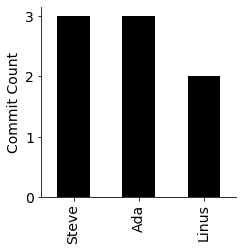

In [5]:
#q3
n=Series(name)
ax=n.plot.bar(figsize=(3.5,3.5), color="black")
ax.set_ylabel("Commit Count")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [6]:
#q4

def weekendworkers():
    workers=[]
    for i in count:
        workday=datetime.fromtimestamp(i.authored_date)
        if datetime.isoweekday(workday)== 6 or 7:
            workers.append(i.author.name)
        return workers
        
set(weekendworkers())

{'Steve'}

In [7]:
#q5
l=list()
path=os.path.join("repo","wc.py")

for commit in count:
    repo.git.checkout(commit)
    with open(path) as f:
        l.append(len(f.readlines()))
line=l.sort()

d=[]
for i in count:
    t=i.authored_date
    d.append(t)
days=pd.Series(d)
days=(days-days[7])/86400

days=days.sort_values()

df = pd.DataFrame({"days":days,
                  "lines":l})
df.reset_index(drop=True)

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


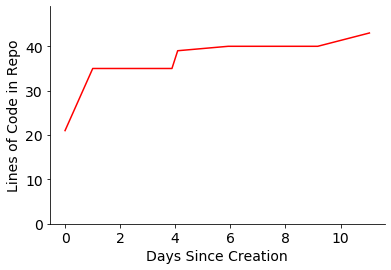

In [8]:
#q6
ax=df.plot.line(x="days",y="lines", color="red",legend=False)
ax.set_ylim([0,49])
ax.set_ylabel("Lines of Code in Repo")
ax.set_xlabel("Days Since Creation")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [9]:
#q7

# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

def run_wc(body, commit=None):
    with open("test.txt", "w") as f:
        f.write(body)
    path=os.path.join("repo","wc.py")
    if commit==None:
        repo.git.checkout(count[0])
        commit="master"
    repo.git.checkout(commit)
    try:
        a=check_output(["python3",path,"test.txt","All"],universal_newlines=True)
        return json.loads(a)
    except CalledProcessError :
        return None
    
run_wc(test1)    

{'X': 1, 'Y': 1, 'Z': 1}

In [10]:
#q8
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [28]:
#q9

countreversed=list(reversed(list((repo.iter_commits('master')))))
def test_table(body, expected):
    msg=[]
    author=[]
    result=[]
    for i in countreversed:
        m=i.message.strip()[:20]
        msg.append(m)
        au=i.author.name
        author.append(au)
        wc=run_wc(body,i)
        result.append(wc == expected)
    df=pd.DataFrame({"commit": countreversed,
                     "msg20":msg,
                 "author":author,
                 "pass":result})
    return df
        
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [29]:
#q10
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [30]:
#q11
test_table(test3, {'A': 2, 'B': 1, 'C': 1})

# I think the test3 is the most useful for evaluating the wc.py program.
#Because it catched the most commit version that os not pass. 

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


/home/yatin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


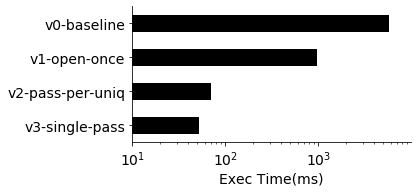

In [14]:
#q12
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    words=[]
    for i in range(uniq_words):
        a=random.choices("abcdefghigklmnopqrstuvwxyz",k=word_size)
        a="".join(a)
        words.append(a)
    final=random.choices(words,k=total_words)
    t0=time.time()
    c=run_wc(str(final),commit)
    t1=time.time()
    return (t1-t0)*1000
        
q12=Series()
for i in versions:
    toplot=time_run_sec(100,5000, word_size=6,commit=versions[i])
    q12[i]=toplot
    
ax=q12.plot.barh(figsize=(5,2.5),color="black",log=True)
ax.invert_yaxis()
ax.set_xlim([10,9999])
ax.set_xlabel("Exec Time(ms)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


/home/yatin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


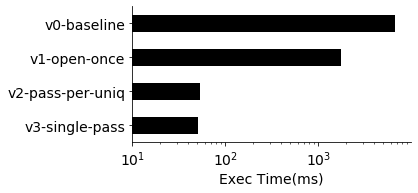

In [15]:
#q13

q13=Series()
for i in versions:
    top=time_run_sec(1,5000, word_size=6,commit=versions[i])
    q13[i]=top

ax=q13.plot.barh(figsize=(5,2.5),color="black",log=True)
ax.invert_yaxis()
ax.set_xlim([10,9999])
ax.set_xlabel("Exec Time(ms)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#based on figure q12 and q13, when the unique word is bigger than 100, Version 3 does better than the version 2
#because v3 runs faster. 

In [39]:
persent_uniq=[0.1,0.05,0.01]
tw=[1000,2000,5000,10000]

def get_time(v):
    temp=dict()
    for i in persent_uniq:
        pu=dict()
        for n in tw:
            t0=time.time()
            a=time_run_sec(int(i*n),n,commit=v)
            t1=time.time()
            pu[n]=t1-t0
        temp[int(i*100)]=pu
    df=DataFrame(temp)
    df.index.name = "totol word"
    df.columns.name = "uniq persent"
    return df

v2=get_time(versions["v2-pass-per-uniq"])
v3=get_time(versions["v3-single-pass"])

v2

uniq persent,10,5,1
totol word,,,
1000,0.076466,0.055231,0.050700
2000,0.071310,0.062331,0.054233
5000,0.152219,0.103259,0.065731
10000,0.439606,0.248714,0.096486


Text(0.5, 1.0, 'Version 3')

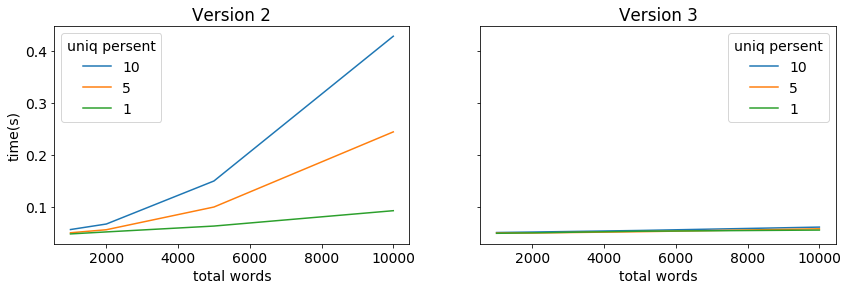

In [17]:
#q14
t=plt.subplots(ncols=2,sharey=True, figsize=(14,4))
ax_list = list(t[1])
f=v2.plot.line(ax=ax_list[0])
f.set_xlabel("total words")
f.set_ylabel("time(s)")
f.set_title("Version 2")

f=v3.plot.line(ax=ax_list[1])
f.set_xlabel("total words")
f.set_title("Version 3")


Text(0.5, 1.0, 'Version 3')

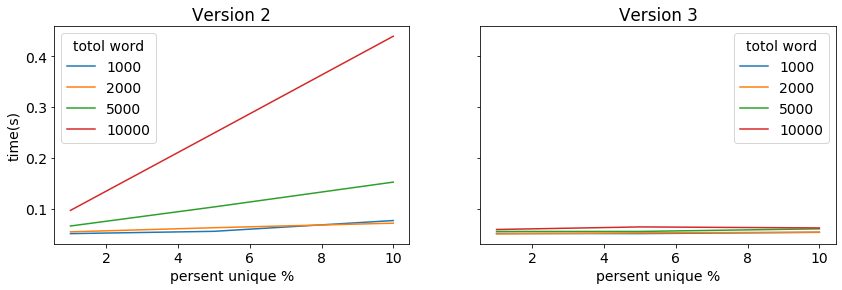

In [72]:
#q15
t=plt.subplots(ncols=2,sharey=True, figsize=(14,4))
ax_list = list(t[1])
f=v2.transpose().plot.line(ax=ax_list[0])
f.set_xlabel("persent unique %")
f.set_ylabel("time(s)")
f.set_title("Version 2")

f=v3.transpose().plot.line(ax=ax_list[1])
f.set_xlabel("persent unique %")
f.set_title("Version 3")

# I think q14 shows trend more clearly. Beacuse we see the total word is the major scale, 
#to show the total number of words is incresing at x axis and the the unique persentage shows 
#porportion of the total word is a way to comapre between total amount, which shows in different color.
# therefore we can compaere it more directly. 


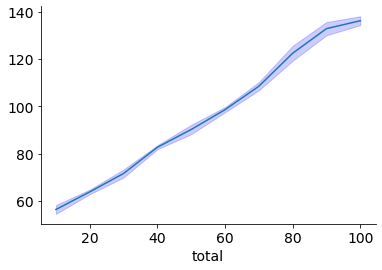

In [40]:
#q16
df = DataFrame()
df.index.name = "total"
df.columns.name = "trial"
for i in range(10):
    total_words = 10000 * (i+1)
    uniq = total_words // 10
    for trial in range(5):
        re= time_run_sec(uniq,total_words,6,versions["v3-single-pass"])
        df.loc[total_words/1000, trial] = re
df

mean = df.mean(axis=1)
std = df.std(axis=1)

ax=mean.plot.line()
plt.fill_between(mean.index, mean-std, mean+std, color='b', alpha=0.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [66]:
#q17

class Counter():
    def __init__(self):
        self.dict={}
    
    def __setitem__(self, key, item): 
        self.dict[key.upper()] = item
        
    def __getitem__(self, key): 
        try:
            return self.dict[key.upper()]
        except KeyError :
            self.dict[key.upper()]=0
            return 0

    def __repr__(self):
        return str(self.dict) 
        
    def max_keys(self):
        most=0
        l=[]
        for i in self.dict:
            if self.dict[i]>most:
                most=self.dict[i]
        for i in self.dict:
            if self.dict[i]==most:
                l.append(i)
        return l
        
c = Counter()

c["apple"]

0

In [68]:
#q18
c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2

c["banana"]

2

In [69]:
#q19

c


{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [70]:
#q20
c.max_keys()

['BANANA', 'KIWI']